In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson

In [2]:
def enlaces_aleatorios(N, p):
  for i in range(N):
    for j in range(i):
      if np.random.rand() < p:
        yield i,j

def red_aleatoria(N, p):
  G = nx.Graph()
  G.add_nodes_from(range(N)) # agrega todos los nodos
  
  G.add_edges_from( enlaces_aleatorios(N, p) ) # agrega los enlaces obedeciendo la probabilidad p
  
  return G

Recordar que bins divide nuestro histograma en la cantidad de datos que queramos en partes iguales.

In [3]:
N = 100
p = 0.5
corridas = 500
Y = np.zeros(N)
for i in range(corridas):
  G = red_aleatoria(N,p)
  grados = np.array([G.degree[nodo] for nodo in G])
  # El parámetro de de density nos permite que los datos estén acotados entre 0 y 1
  y,x = np.histogram(grados, bins = range(N+1), density = True)
  Y += y/corridas

In [4]:
# np.histogram(grados, bins = range(M+2))

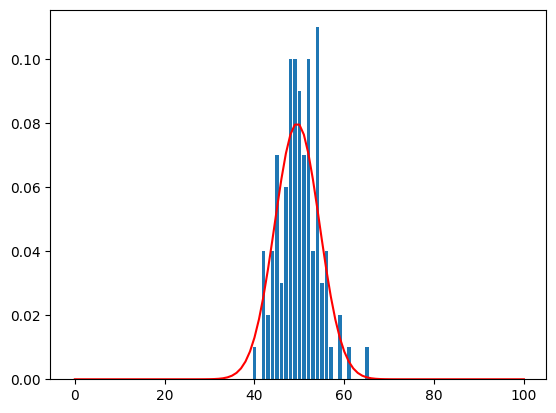

In [5]:
plt.bar(x[:-1],y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.show()

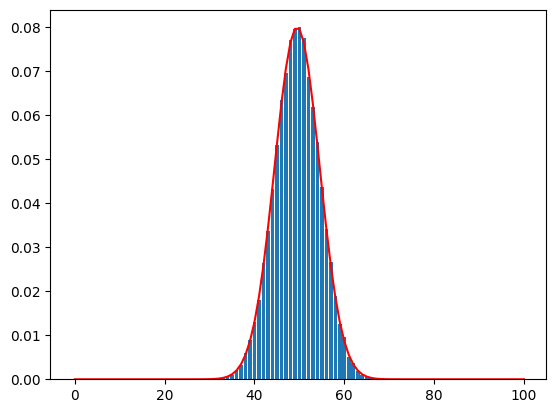

In [6]:
plt.bar(x[:-1],Y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.show()

Podemos notar que el número de corridas, mientras sean más, el histograma se podrá adaptar mejor a la curva generada por la distribución.

In [7]:
m = 0
for i,n in enumerate(Y/Y.sum()):
  m += i*n

<function matplotlib.pyplot.show(close=None, block=None)>

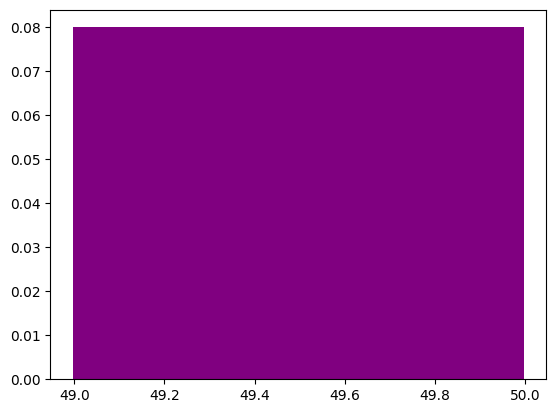

In [8]:
plt.bar([m],[max(Y)],width = 1,color = "purple")
plt.show

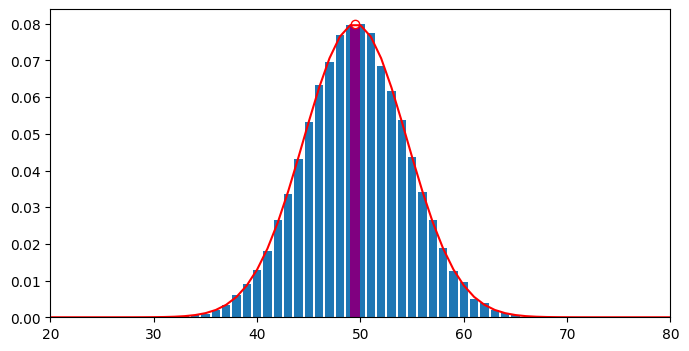

In [9]:
plt.figure(figsize = [8,4])
plt.bar(x[:-1],Y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.bar([m],[max(Y)],width = 1,color = "purple")
plt.scatter(p*(N-1),max(Y),facecolor = "white",edgecolor = "red")
plt.xlim([20,80])
plt.show()

$\left<k \right> = p(N-1)$

$p = \frac{\left<k \right>}{N-1}$

$\frac{\left<k \right>}{N-1} \rightarrow 0$

$x \ll 1 ; x\sim 1/100$

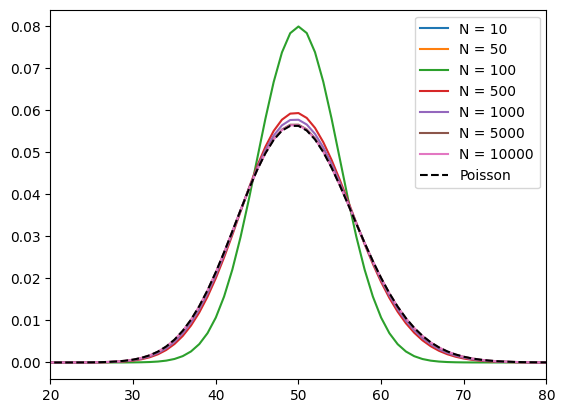

In [10]:
# Estamos usando las fórmulas para poder determinar p
k = 50
N = 1000
p = k/(N-1)

for N in [10, 50, 100,500,1000,5000,10000]:
  p = k/(N-1)
  plt.plot(x,binom.pmf(x,N-1,p),label = "N = " + str(N))

plt.plot(x,poisson.pmf(x,k),"k--",label = "Poisson")
plt.xlim([20,80])
plt.legend()
plt.show()

# plt.plot(x,binom.pmf(x,N-1,p)*(N-1),"r-")
# plt.xlim([20,80])

Para cualquier red real: Si queremos aproximar a la red real con su red aleatoria podríamos suponer que tiene una distribución de Poisson

# Evidencia práctica 4

## 2.1.2. Coeficiente de acumulación (agrupamiento) de los nodos

El coeficiente de acumulación promedio es:
 0.6944824319748686
La probabilidad de enlace p es:
 0.7


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

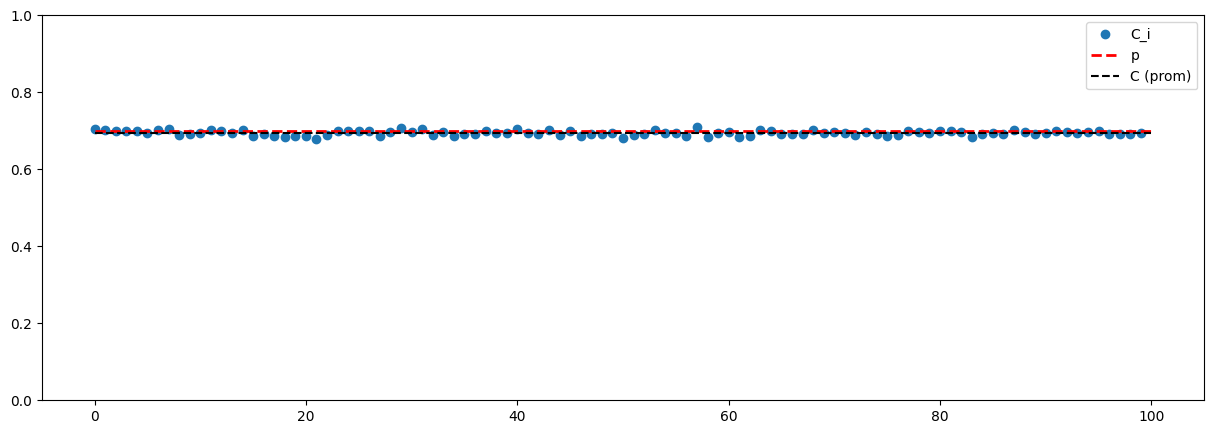

In [11]:
N = 100
p = .7

G = red_aleatoria(N,p)
C = nx.average_clustering(G)
print('El coeficiente de acumulación promedio es:\n', C)
print('La probabilidad de enlace p es:\n', p)

diccionario = nx.clustering(G)
Y = [diccionario[i] for i in G]

plt.figure(figsize = [15,5])
plt.plot(Y, 'o', label = 'C_i')
plt.plot([0,N], [p,p], 'r--', linewidth = 2, label = 'p')
plt.plot([0,N], [C,C], 'k--', label = 'C (prom)')
plt.ylim([0,1])

plt.legend()
plt.xlabel